In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

%matplotlib inline
plt.style.use('ggplot')

In [6]:
df_train = pd.read_csv('train.csv', sep="," , encoding="UTF8" )
df_test = pd.read_csv('test.csv', sep="," , encoding="UTF8" )

### Quais colunas temos na base de test para trabalhar ?

In [7]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

### Selecionando features que nos interessa

In [18]:
features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

features_corr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

### Valores nulos 

In [8]:
df_train[features].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

### Matriz de Correlação 

In [8]:
df_train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,...,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,...,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,...,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,-0.007201,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,...,-0.044791,0.025077,-0.030681,0.012739,0.021949,-0.003569,-0.035306,-0.069973,-0.010988,0.160526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q037,-0.004914,NaN,-0.013479,-0.013647,-0.003569,0.002294,0.086642,0.032588,-0.024174,-0.024201,...,0.220839,0.225791,0.245757,0.202230,0.387722,1.000000,0.496678,0.254418,0.270380,0.187921
Q038,0.003906,NaN,-0.032710,-0.032467,-0.035306,-0.014725,0.069298,0.024112,-0.038666,-0.038305,...,0.159887,0.223508,0.215767,0.142610,0.378421,0.496678,1.000000,0.374424,0.259947,0.219529
Q039,0.001002,NaN,-0.094862,-0.094113,-0.069973,-0.066346,0.046830,0.011327,-0.097273,-0.096666,...,0.144264,0.206979,0.189252,0.225724,0.270343,0.254418,0.374424,1.000000,0.305357,0.262031
Q040,-0.010967,NaN,-0.077456,-0.076838,-0.010988,-0.022736,0.053556,0.014847,-0.081490,-0.080963,...,0.215292,0.176028,0.243190,0.179292,0.177025,0.270380,0.259947,0.305357,1.000000,0.306438


Como temos bastante valores nulls será necessário trabalhar com eles.

### HeatMap de Correlação

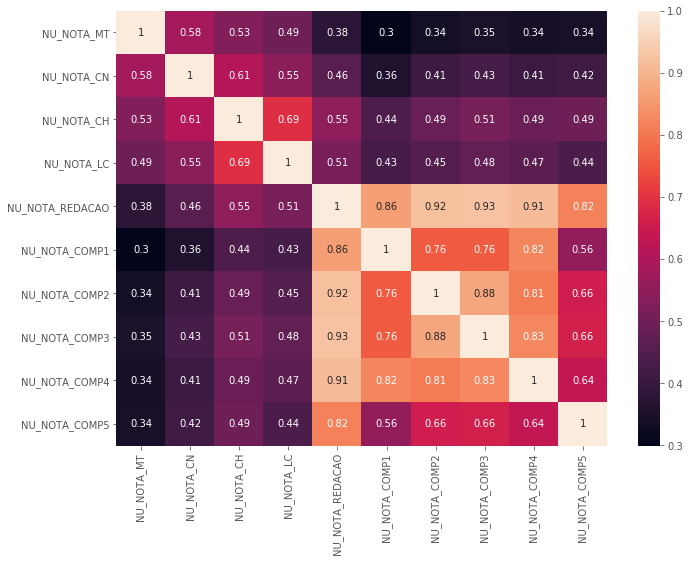

In [9]:
corr = df_train[features_corr].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

VAMOS REMOVER VALORES DE 0 E NULL do dataset das features de interese 

In [12]:
df_train = df_train.loc[
      (df_train['NU_NOTA_CN'].notnull())  & (df_train['NU_NOTA_CN'] != 0) & (df_train['NU_NOTA_CH'].notnull()) & (df_train['NU_NOTA_CH'] != 0) 
    & (df_train['NU_NOTA_LC'].notnull())  & (df_train['NU_NOTA_LC'] != 0) & (df_train['NU_NOTA_REDACAO'].notnull()) & (df_train['NU_NOTA_REDACAO'] != 0)    
]

### Distribuição dos dados:

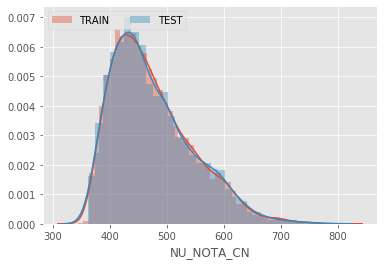

In [13]:
sns.distplot(df_train['NU_NOTA_CN'].fillna(0))
sns.distplot(df_test['NU_NOTA_CN'].fillna(0))
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

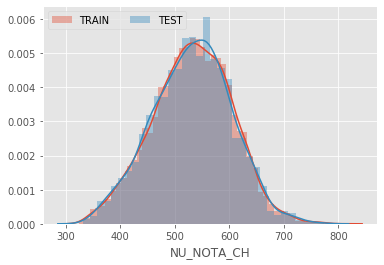

In [14]:
sns.distplot(df_train['NU_NOTA_CH'].fillna(0))
sns.distplot(df_test['NU_NOTA_CH'].fillna(0))
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

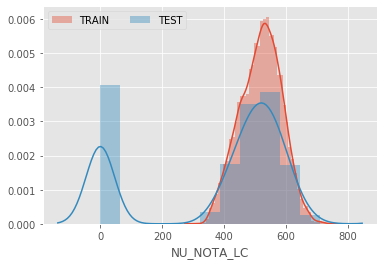

In [13]:
sns.distplot(df_train['NU_NOTA_LC'].fillna(0))
sns.distplot(df_test['NU_NOTA_LC'].fillna(0))
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

#### Selecionando somente valores diferentes de 0 e não nulos na base de test

In [16]:
df_test = df_test.loc[
      (df_test['NU_NOTA_CN'].notnull())  & (df_test['NU_NOTA_CN'] != 0) & (df_test['NU_NOTA_CH'].notnull()) & (df_test['NU_NOTA_CH'] != 0) 
    & (df_test['NU_NOTA_LC'].notnull())  & (df_test['NU_NOTA_LC'] != 0) & (df_test['NU_NOTA_REDACAO'].notnull()) & (df_test['NU_NOTA_REDACAO'] != 0)
]

### Verificando a quantidade de notas ‘nulls’ na base de test

In [19]:
df_test[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

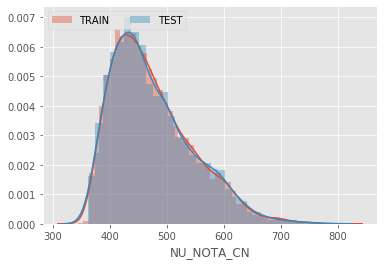

In [20]:
sns.distplot(df_train['NU_NOTA_CN'].fillna(0))
sns.distplot(df_test['NU_NOTA_CN'].fillna(0))
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

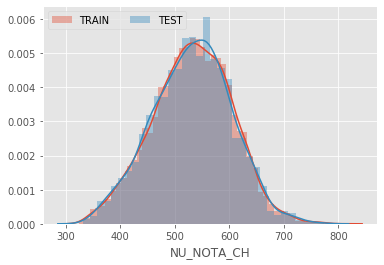

In [21]:
sns.distplot(df_train['NU_NOTA_CH'].fillna(0))
sns.distplot(df_test['NU_NOTA_CH'].fillna(0))
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

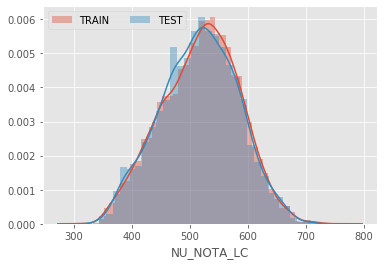

In [22]:
sns.distplot(df_train['NU_NOTA_LC'].fillna(0))
sns.distplot(df_test['NU_NOTA_LC'].fillna(0))
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

### Criando o modelo de regressão Zerando os campos nulos de composição da nota de redação:


In [23]:
df_test['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP5'].fillna(0,inplace=True)

df_train['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP5'].fillna(0,inplace=True)

###### Seguindo: Atribuir y_train ao meu target, Setar x test e x train com as features selecionadas, Normalizar os dados - Atribuir y_train ao meu target, Setar x test e x train com as features selecionadas e Normalizar os dados

In [26]:
y_train = df_train['NU_NOTA_MT']
x_train = df_train[features]
x_test = df_test[features]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

RandomForestRegressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)

Treinando o nosso modelo através do fit:

In [28]:
regressor.fit(x_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=8, n_estimators=500, n_jobs=-1,
                      random_state=0)

## Realizando a predição das notas da nossa base test:

In [29]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [30]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 53.31348913
MSE: 4678.43225585
RMSE: 68.39906619


In [31]:
y_pred_test

array([417.6684, 442.114 , 591.9343, ..., 470.5929, 696.6326, 445.5773])

###  Salvando os Resultados

In [32]:
df_resposta = pd.DataFrame()
df_resposta['NU_INSCRICAO'] = df_test['NU_INSCRICAO']
df_resposta['NU_NOTA_MT'] = np.around(y_pred_test)

In [33]:
df_resposta

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,418.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,442.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,592.0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,507.0
5,e656d6bad65c93fb2880f1eba5037008c8e75774,467.0
...,...,...
4570,13aaf6335f43cfc1b8baeac559324f20b2653724,512.0
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,445.0
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,471.0
4573,655fa6306720ff16e825903b5422a46608a77545,697.0


In [34]:
df_resposta.to_csv('answer.csv', index=False, header=True)